In [8]:
import os

base_dir = ('/home/cialyni/Рабочий стол/spbu_programming_4_sem/src/KNN') 
os.chdir(base_dir)

import pandas as pd
import matplotlib.pyplot as plt
from processing import *
from classifier import KNNClassifier

In [9]:
spam_df = pd.read_csv('datas/spam.csv')
spam_df = spam_df.sample(frac=1).reset_index(drop=True)
spam_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,1.32,0.56,0.0,0.00,0.94,0.00,0.18,0.37,0.75,...,0.000,0.080,0.000,0.242,0.107,0.000,2.623,35,244,1
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.986,0.000,0.000,8.000,38,80,1
2,0.00,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.00,0.82,...,0.199,0.530,0.331,0.199,0.000,0.000,5.019,18,261,1
3,0.07,0.00,0.14,0.0,0.07,0.00,0.00,0.00,0.74,0.00,...,0.116,0.200,0.042,0.000,0.021,0.000,2.790,36,681,0
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,3.250,10,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.210,0.000,0.000,0.000,0.000,1.736,12,125,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.68,0.00,...,0.000,0.000,0.000,0.523,0.000,0.000,1.218,5,39,0
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.664,0.000,0.000,0.000,0.000,3.157,11,60,0
4599,0.00,0.19,0.00,0.0,0.68,0.09,0.09,0.00,0.29,0.09,...,0.000,0.030,0.000,0.060,0.045,0.000,1.597,20,329,1


Подготовка выборок данных для обучения и тестирования

In [10]:
X = spam_df.drop('label', axis=1).values 
y = spam_df['label'].values
X_train, y_train, X_test, y_test = train_test_split(
    X, y, 
    test_size=0.2,           
    random_state=None,         
    shuffle=True             
)


In [11]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'No Scaling': None  }

k_values = range(1, 16)
results = {}

best_k = 1
accuracy_k, f1_k = 0, 0

Обучение модели на разных гиперпараметрах k и разных способах масштабирования

In [12]:
for scaler_name, scaler in scalers.items():
    if scaler:
        X_train_processed = scaler.fit_transform(X_train)
        X_test_processed = scaler.transform(X_test)
    else:
        X_train_processed = X_train.copy()
        X_test_processed = X_test.copy()
    
    accuracies = []
    f1_scores = []
    
    for k in k_values:
        knn = KNNClassifier(k=k, leaf_size=20)
        knn.fit(X_train_processed, y_train)
        y_pred = knn.predict(X_test_processed)
        accuracy = Metrics.accuracy(y_pred, y_test)
        f1 = Metrics.f1_score(y_pred, y_test)

        accuracies.append(accuracy)
        f1_scores.append(f1)

        if f1 > f1_k:
            best_k = k
            accuracy_k = accuracy
            f1_k = f1

    results[scaler_name] = {
        'accuracies': accuracies,
        'f1_scores': f1_scores,
    }

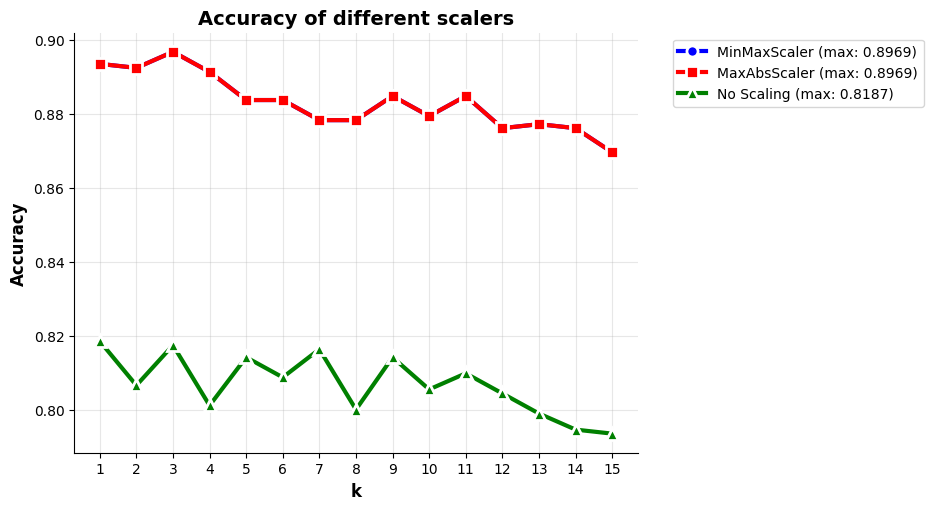

In [13]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 1)
colors = ['blue', 'red', 'green']  
markers = ['o', 's', '^']  
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['accuracies'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["accuracies"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Accuracy of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True, alpha=0.3)
plt.xticks(k_values) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

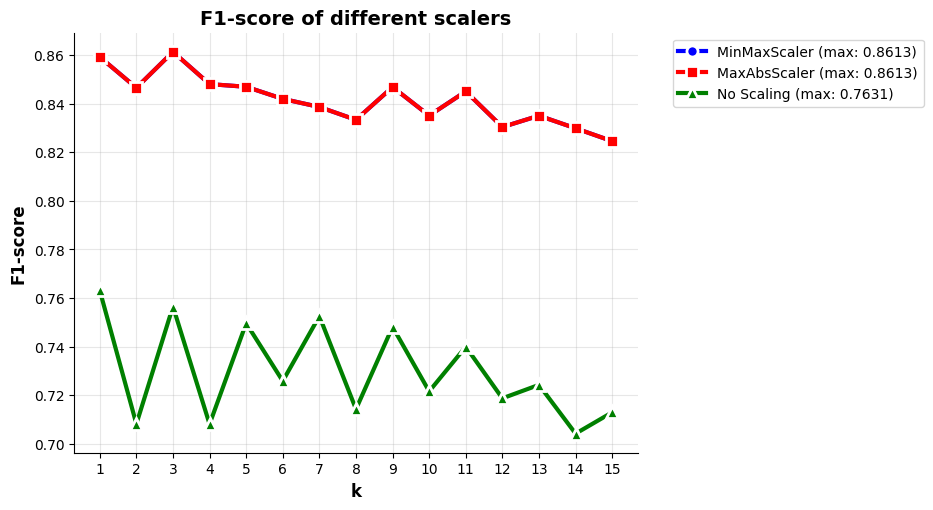

In [14]:
plt.figure(figsize=(16, 12))  
plt.subplot(2, 2, 2)
for i, (scaler_name, result) in enumerate(results.items()):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(k_values, result['f1_scores'], 
             marker=marker, 
             color=color, 
             linewidth=3, 
             markersize=8, 
             markeredgewidth=2,
             markeredgecolor='white',
             label=f'{scaler_name} (max: {max(result["f1_scores"]):.4f})')

plt.xlabel('k', fontsize=12, fontweight='bold')
plt.ylabel('F1-score', fontsize=12, fontweight='bold')
plt.title('F1-score of different scalers', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Оба способоа масштабирования показали одинаковый результат, лучший чем при его остутствии. Наибольшие F1-score и Accuracy были получены при k = 3 (в данной выборки данных). Разница между accuracy=0.89 и f1-score=0.86 - достаточно мала, что дает нам возможность полагать, что модель обучена хорошо